# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2"
# dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
from ind_tools.IndTransformer import IndTransformer

In [60]:
sceneId = 230
date = "2022-12-22"
date = "2023-05-04"
fps=10
minYDisplacement = 5
maxXDisplacement = 9
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))


In [61]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps=fps,
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

indTransformer = IndTransformer(colMapper)

In [62]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,24728.000000,24728.000000,2.472800e+04,24728.0,24728.0,24728.000000,24728.000000,24728.000000,24728.000000,24728.000000,24728.000000,24728.000000,24728.000000,24728.000000
mean,23.624191,15125.813127,3.437315e+04,230.0,6.0,0.988770,-0.016718,0.040453,0.127631,0.001783,0.001067,0.540740,1.035334,2.971366
std,3.293005,9110.321677,1.513126e+05,0.0,0.0,1.683482,1.753194,0.189658,0.500041,0.045397,0.044779,0.107357,0.903914,1.755230
min,18.000000,4.000000,1.800400e+04,230.0,6.0,-7.390032,-3.133389,-0.645913,-0.856240,-0.687011,-0.398223,0.026191,0.000000,0.000000
25%,21.000000,6868.000000,2.131700e+04,230.0,6.0,0.180970,-1.524617,-0.127497,-0.471645,-0.019961,-0.024841,0.479286,0.375401,1.461006
50%,24.000000,15550.500000,2.416500e+04,230.0,6.0,1.268817,-0.015236,0.086693,0.408200,0.001531,-0.000134,0.550313,0.846922,2.952926
75%,26.000000,22484.500000,2.646800e+04,230.0,6.0,1.985575,1.483321,0.171724,0.544858,0.023771,0.026177,0.615172,1.429045,4.482053
max,29.000000,32083.000000,2.219001e+06,230.0,6.0,7.334196,3.130092,0.667261,0.816978,0.306398,0.441813,0.896779,6.784121,6.112806


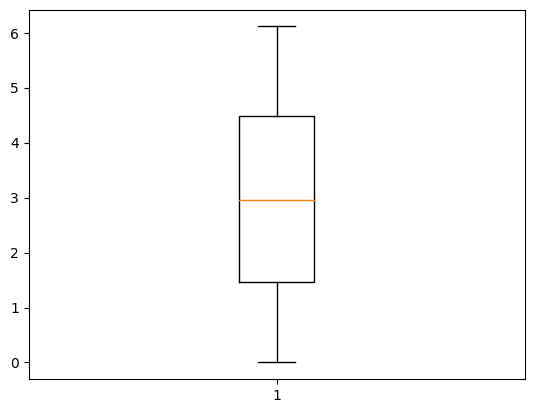

{'whiskers': [<matplotlib.lines.Line2D at 0x1e480585040>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4801bea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e480585e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4801be1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4801be310>],
 'means': []}

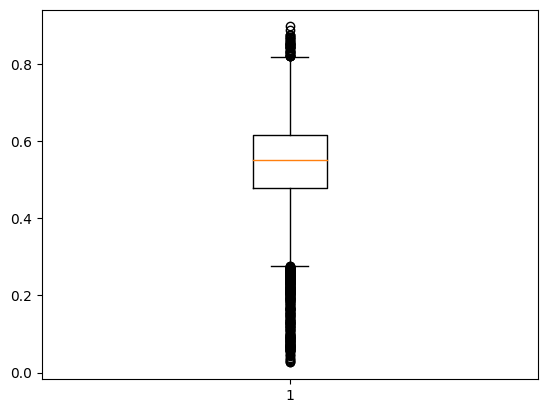

In [63]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

## Preprocessing data
### 1. Transform to local coordinate system

In [64]:
# transformer.translateAllToLocalSource(pedDf)

# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

### 2. Derive displacement in local coordinate system again.

In [65]:
# transformer.deriveDisplacementsInLC(pedDf)

### 1. filter out data with low Y displacement

using min Y displacement (5)


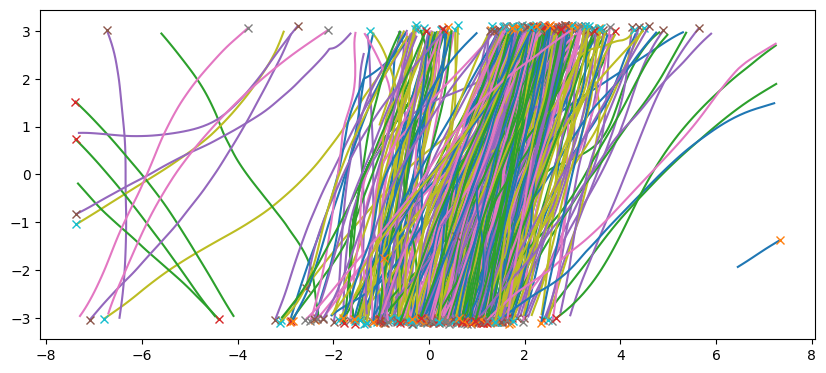

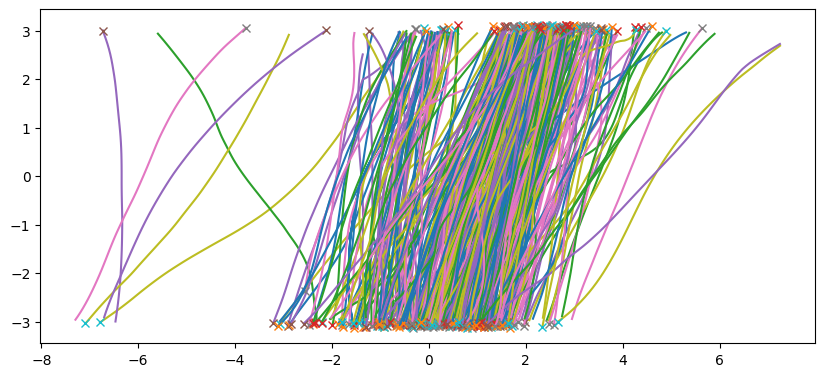

In [66]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

### 2. Transform trajectories to local source coordinate system

In [67]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)
# cleanPedDf.head()

In [68]:
# tracksMeta.head()

In [69]:
# tracksMeta[(tracksMeta['verticalDirection'] == 'NORTH') & (tracksMeta['class'] == 'pedestrian')]

In [70]:
# allPedIds

### 3. Rotate north-south trajectories to south-north trajectories

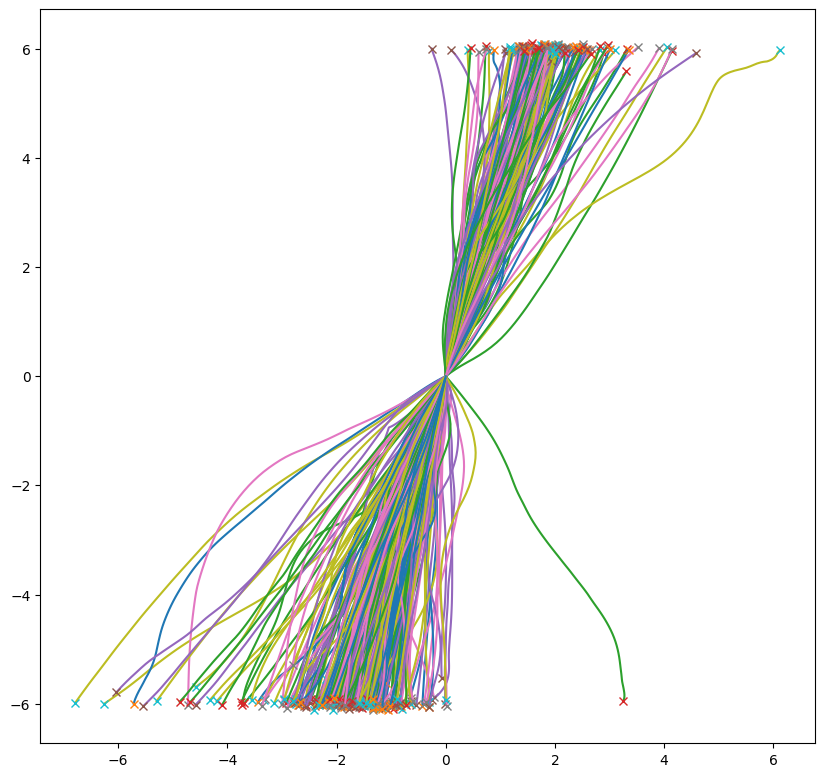

In [71]:
southIds = indTransformer.convertLocalToNorth(cleanPedDf, tracksMeta)
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

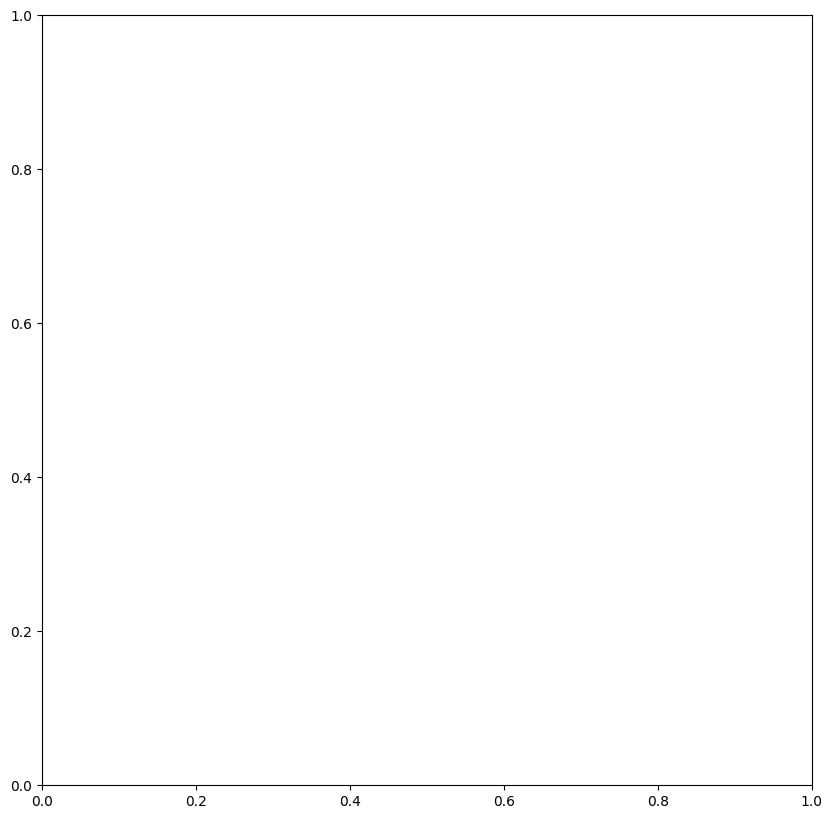

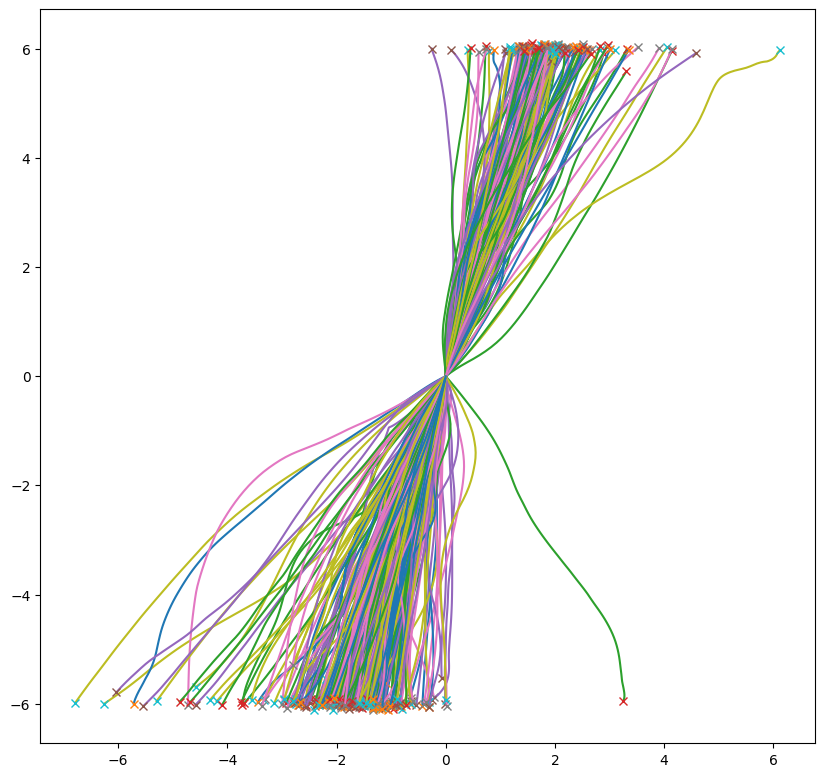

In [72]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

### 4. Shape Analysis from Local Source

### Shape dependencies:
1. Crosswalk / Midblock
2. Crosswalk - on-coming start/end, driving lane near/far
3. Crosswalk - discontinued on left/right (can distinuation point be an input?)
4. Width

### 5. Modeling approaches
1. Polygon
2. Influence heatmap (each point on a trajectory has a influence area, we need to define a datastructure for it) (or not)
3. 

#### 5.1 Polygon

In [73]:
from tti_dataset_tools import CrosswalkModel
crosswalkModel = CrosswalkModel(colMapper)

In [77]:
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,464,18004,230,6.0,-0.598772,2.961484,0.126653,0.470234,0.038711,0.032179,0.486991,0.000000,0.000000,0.000000,0.000000
1,18,466,18004,230,6.0,-0.622740,2.868045,0.119838,0.467196,0.034072,0.015187,0.482321,0.023968,0.093439,-0.023968,-0.093439
2,18,468,18004,230,6.0,-0.646141,2.775348,0.117007,0.463482,0.014156,0.018572,0.478023,0.047369,0.186136,-0.047369,-0.186136
3,18,470,18004,230,6.0,-0.668187,2.683402,0.110230,0.459729,0.033886,0.018762,0.472760,0.069415,0.278081,-0.069415,-0.278081
4,18,472,18004,230,6.0,-0.688302,2.591600,0.100574,0.459012,0.048280,0.003584,0.469902,0.089530,0.369884,-0.089530,-0.369884


In [74]:
northPeds.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,464,18004,230,6.0,-0.598772,2.961484,0.126653,0.470234,0.038711,0.032179,0.486991,0.000000,0.000000,0.000000,0.000000
1,18,466,18004,230,6.0,-0.622740,2.868045,0.119838,0.467196,0.034072,0.015187,0.482321,0.023968,0.093439,-0.023968,-0.093439
2,18,468,18004,230,6.0,-0.646141,2.775348,0.117007,0.463482,0.014156,0.018572,0.478023,0.047369,0.186136,-0.047369,-0.186136
3,18,470,18004,230,6.0,-0.668187,2.683402,0.110230,0.459729,0.033886,0.018762,0.472760,0.069415,0.278081,-0.069415,-0.278081
4,18,472,18004,230,6.0,-0.688302,2.591600,0.100574,0.459012,0.048280,0.003584,0.469902,0.089530,0.369884,-0.089530,-0.369884


In [23]:
roadWidth = 6.0
interval = 1.0
yTolerance = 0.1

yBreakpoints = list(np.arange(interval, roadWidth, interval))
if (yBreakpoints[-1] - roadWidth) < 0.2:
    yBreakpoints.append(roadWidth)
    
breakpointXVals = crosswalkModel.getAllLocalXAtLocalYBreakpoints(
        tracksDf = northPeds,
        yBreakpoints = yBreakpoints,
        yTolerance = yTolerance
    )

In [24]:
yBreakpoints

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

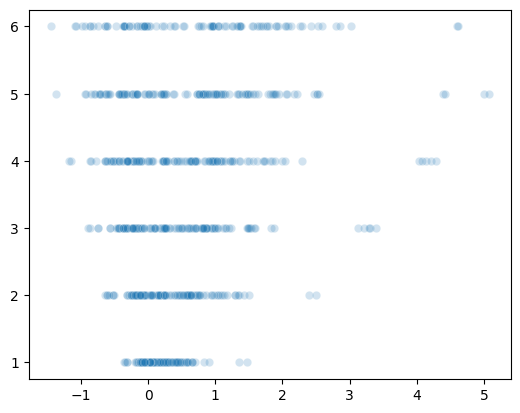

In [25]:
visualizer.showBreakpointVals(breakpointXVals)

In [26]:
# with min-max
minVals = [min(breakpointXVals[y]) for y in breakpointXVals]
maxVals = [max(breakpointXVals[y]) for y in breakpointXVals]

In [27]:
minVals

[-0.35403559323107503,
 -0.6349895672795756,
 -0.8943569063887107,
 -1.1771108033399367,
 -1.3643359057735231,
 -1.450887893345346]

In [28]:
maxVals

[1.4704225783642637,
 2.4978911227391567,
 3.389357755785891,
 4.291985868250096,
 5.068896784716372,
 4.607294970255896]

In [29]:
polygon = crosswalkModel.generatePolygonFromBreakpointVals(breakpointXVals)

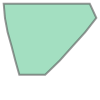

In [30]:
polygon

In [31]:
tuple(polygon.exterior.coords)

((-0.35403559323107503, 1.0),
 (-0.6349895672795756, 2.0),
 (-0.8943569063887107, 3.0),
 (-1.1771108033399367, 4.0),
 (-1.3643359057735231, 5.0),
 (-1.450887893345346, 6.0),
 (4.607294970255896, 6.0),
 (5.068896784716372, 5.0),
 (4.291985868250096, 4.0),
 (3.389357755785891, 3.0),
 (2.4978911227391567, 2.0),
 (1.4704225783642637, 1.0),
 (-0.35403559323107503, 1.0))

## Mining polygons

In [38]:
from tti_dataset_tools import CrosswalkModel
from collections import defaultdict

In [33]:
minYDisplacement = 5
maxXDisplacement = 9
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps=fps,
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

indTransformer = IndTransformer(colMapper)

crosswalkModel = CrosswalkModel(colMapper)

In [55]:
sceneIds = [210, 211, 222, 230, 231, 240]
date = "2023-05-04"
fps=10
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

scene id 210
using min Y displacement (4.0)
roadWidth: 5.0 yBreakpoints [1.0, 2.0, 3.0, 4.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


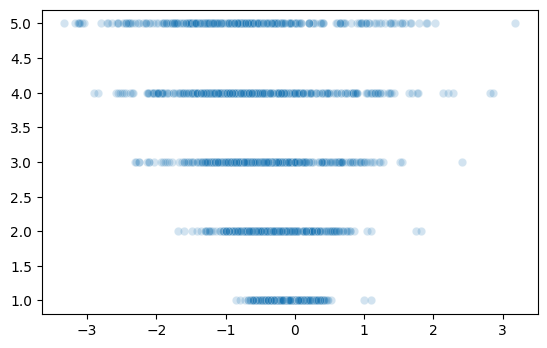

scene id 211
using min Y displacement (4.0)
roadWidth: 5.0 yBreakpoints [1.0, 2.0, 3.0, 4.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


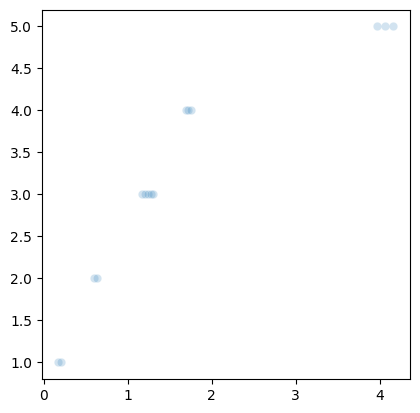

scene id 222
using min Y displacement (8.0)
roadWidth: 9.0 yBreakpoints [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


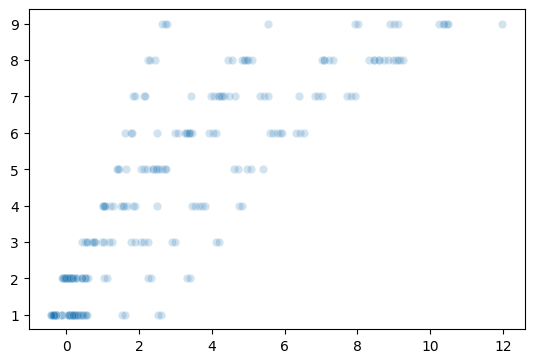

scene id 230
using min Y displacement (5.0)
roadWidth: 6.0 yBreakpoints [1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


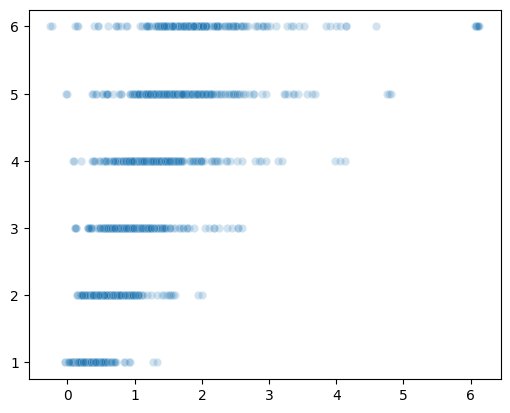

scene id 231
using min Y displacement (5.0)
roadWidth: 6.0 yBreakpoints [1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


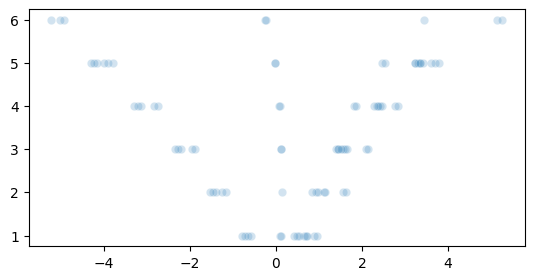

scene id 240
using min Y displacement (5.0)
roadWidth: 6.0 yBreakpoints [1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


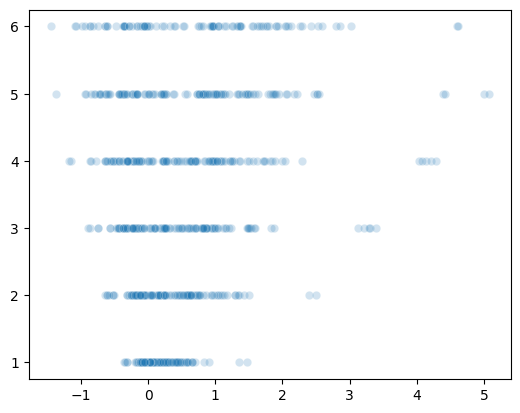

In [78]:
polygons = defaultdict(lambda : []) # width - > List[poly]
for sceneId in sceneIds:
    print(f"scene id {sceneId}")
    pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
    otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
    tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))
    
    transformer.deriveSpeed(pedDf)
    transformer.deriveDisplacements(pedDf)
    
    # roadWidth = 6.0 # all the roads are not 6 meters
    roadWidth = pedDf.iloc[0]["roadWidth"]
    minYDisplacement = roadWidth - 1
    cleaner.minYDisplacement = minYDisplacement
    
    cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
    # visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
    # visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
    
    allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
    transformer.translateAllToLocalSource(cleanPedDf)
    
    southIds = indTransformer.convertLocalToNorth(cleanPedDf, tracksMeta)
    # visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
    
    southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
    # visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
    
    assert len(southPeds) == 0
    northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
    # visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
    
    interval = 1.0
    yTolerance = 0.1

    yBreakpoints = list(np.arange(interval, roadWidth, interval))
    print("roadWidth:", roadWidth, "yBreakpoints", yBreakpoints)
    if (yBreakpoints[-1] - roadWidth) < 0.2:
        yBreakpoints.append(roadWidth)

    breakpointXVals = crosswalkModel.getAllLocalXAtLocalYBreakpoints(
            tracksDf = northPeds,
            yBreakpoints = yBreakpoints,
            yTolerance = yTolerance
        )
    
    # visualizer.showBreakpointVals(breakpointXVals)
    polygon = crosswalkModel.generatePolygonFromBreakpointVals(breakpointXVals)
    polygons[roadWidth].append(polygon)
    # break

5.0


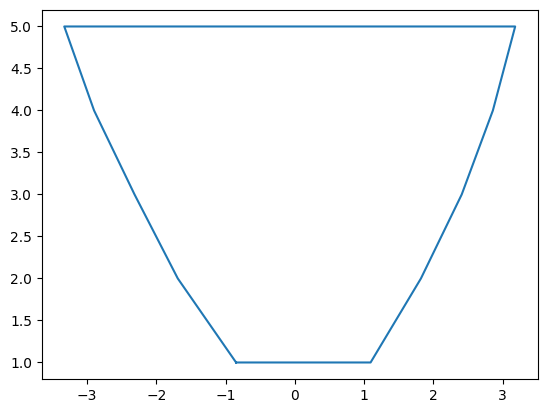

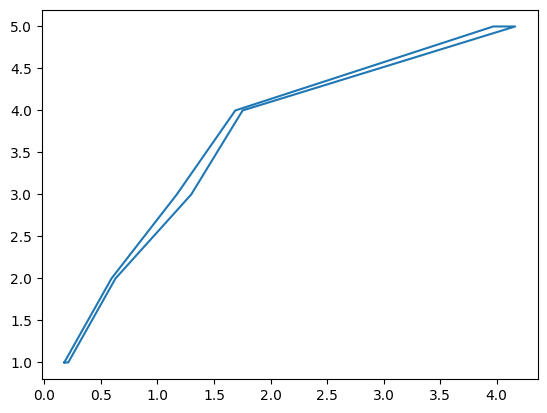

9.0


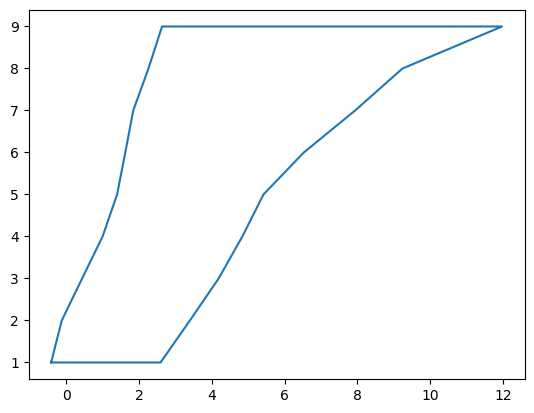

6.0


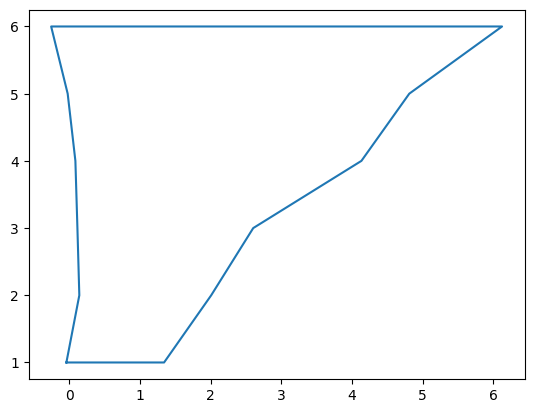

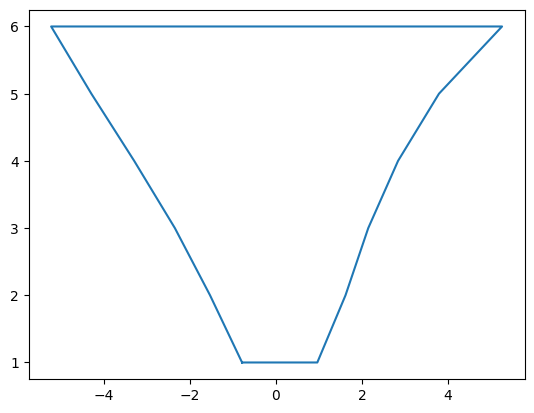

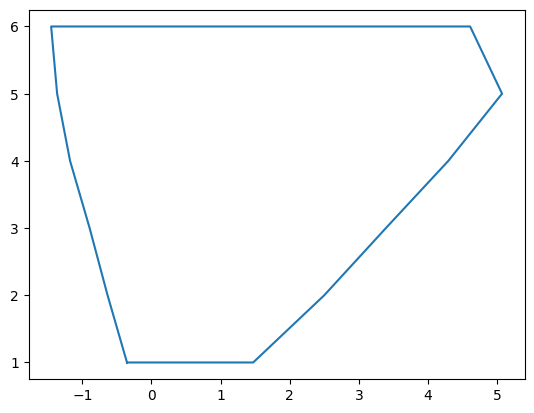

In [79]:
for roadWidth, polys in polygons.items():
    print(roadWidth)
    for poly in polys:
        plt.plot(*poly.exterior.xy)
        plt.show()

In [80]:

polyCoords = defaultdict(lambda : [])
for roadWidth, polys in polygons.items():
    for polygon in polys:
        polyCoords[roadWidth].append(tuple(polygon.exterior.coords))

In [84]:
import json
with open("polygons.json", "w") as f:
    s = json.dumps(polyCoords)
    f.write(s)